In [31]:
# import required packages

import traceback
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import layers
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem

### Data processing

In [32]:
# read data
filePath = r"C:\Users\Ama\OneDrive - Southern University System\02-MachineLearning\Dataset_for_practise\SMP-Er.csv"
df = pd.read_csv(filePath)

test_df = r'C:\Users\Ama\OneDrive - Southern University System\01-Research\01-Data\02-Rubbery_Modulus.csv'
test_df = pd.read_csv(test_df)

In [33]:
#
smiles = df['Smiles']
smiles = [list(smile.strip('{} ').split(',')) for smile in smiles]

molar_ratio = df['Molar ratio']
m_r = []
for entry in molar_ratio:
    ratio_list = [float(x) for x in entry.split(':')]
    m_r.append(ratio_list)

In [34]:
''''
functions for fingerprinting and multiplication of 
fingerprinted monomers by their respective molar ratios
'''
#function for fingerprinting
def fingerprint_monomer(monomer):
    mol = Chem.MolFromSmiles(monomer)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 10, nBits=1028)
    return fp

#function for storing fingerprints monomers as a representation of the polymers
def fingerprint_polymer(polymer):
    polymer_fp = []
    for monomer in polymer:
        monomer_fp = fingerprint_monomer(monomer)
        polymer_fp.append(monomer_fp)
    return polymer_fp

# function for multiplication by their respective molar ratios
def multiply_fingerprint(fp, m_r_value):
    return np.multiply(fp, m_r_value)

fingerprinted_polymer_data = []
for polymer, polymer_m_r in zip(smiles, m_r):
    fingerprinted_polymer = fingerprint_polymer(polymer)
    multiplied_polymer = [multiply_fingerprint(fp, m_r_value) for fp, m_r_value in zip(fingerprinted_polymer, polymer_m_r)]
    fingerprinted_polymer_data.append(multiplied_polymer)
    

#flatten the array created and storing them in a list
flattened_arr = [np.concatenate(arr) for arr in fingerprinted_polymer_data]

#find the maximum length of the flattened arrays
max_length = max(len(arr) for arr in flattened_arr)

# pad the arrays with zeros to make them the same length
padded_arrays = [np.pad(arr, (0, max_length - len(arr)), mode = 'constant') for arr in flattened_arr]

new_array = np.stack(padded_arrays)

In [35]:
X = new_array
y = df['Rubbery modulus'] #specify y

In [36]:
#train on df and test on test_df
test_smiles = test_df['Smiles']
test_smiles = [list(smile.strip('{} ').split(',')) for smile in test_smiles]

test_molar_ratio = test_df['Molar ratio']
test_m_r = []
for entry in test_molar_ratio:
    ratio_list = [float(x) for x in entry.split(':')]
    test_m_r.append(ratio_list)

test_fingerprinted_polymer_data = []
for polymer, polymer_m_r in zip(test_smiles, test_m_r):
    fingerprinted_polymer = fingerprint_polymer(polymer)
    multiplied_polymer = [multiply_fingerprint(fp, m_r_value) for fp, m_r_value in zip(fingerprinted_polymer, polymer_m_r)]
    test_fingerprinted_polymer_data.append(multiplied_polymer)

#flatten the array created and storing them in a list
test_flattened_arr = [np.concatenate(arr) for arr in test_fingerprinted_polymer_data]

#find the maximum length of the flattened arrays
test_max_length = max(len(arr) for arr in test_flattened_arr)

# pad the arrays with zeros to make them the same length



In [37]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Define functions for fingerprinting, fingerprinting polymer, and multiplication
def fingerprint_monomer(monomer):
    mol = Chem.MolFromSmiles(monomer)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 10, nBits=1028)
    return fp

def fingerprint_polymer(polymer):
    polymer_fp = []
    for monomer in polymer:
        monomer_fp = fingerprint_monomer(monomer)
        polymer_fp.append(monomer_fp)
    return polymer_fp

def multiply_fingerprint(fp, m_r_value):
    return np.multiply(fp, m_r_value)

# Define a function to preprocess the data
def preprocess_data(df):
    smiles = df['Smiles']
    smiles = [list(smile.strip('{} ').split(',')) for smile in smiles]

    molar_ratio = df['Molar ratio']
    m_r = []
    for entry in molar_ratio:
        ratio_list = [float(x) for x in entry.split(':')]
        m_r.append(ratio_list)

    fingerprinted_polymer_data = []
    for polymer, polymer_m_r in zip(smiles, m_r):
        fingerprinted_polymer = fingerprint_polymer(polymer)
        multiplied_polymer = [multiply_fingerprint(fp, m_r_value) for fp, m_r_value in zip(fingerprinted_polymer, polymer_m_r)]
        fingerprinted_polymer_data.append(multiplied_polymer)

    # Flatten the array created and store them in a list
    flattened_arr = [np.concatenate(arr) for arr in fingerprinted_polymer_data]

    # Find the maximum length of the flattened arrays
    max_length = max(len(arr) for arr in flattened_arr)

    # Pad the arrays with zeros to make them the same length
    padded_arrays = [np.pad(arr, (0, max_length - len(arr)), mode='constant') for arr in flattened_arr]

    return np.stack(padded_arrays)

# Read and preprocess the training data
train_file_path = r"C:\Users\Ama\OneDrive - Southern University System\02-MachineLearning\Dataset_for_practise\SMP-Er.csv"
train_df = pd.read_csv(train_file_path)
X = preprocess_data(train_df)

# Read and preprocess the test data
test_file_path = r'C:\Users\Ama\OneDrive - Southern University System\01-Research\01-Data\02-Rubbery_Modulus.csv'
test_df = pd.read_csv(test_file_path)
X_val = preprocess_data(test_df)

# Now you have X_train and X_test with the preprocessed data for training and testing, respectively.


In [38]:
y= train_df['Rubbery modulus']
y_val = test_df['Rubbery modulus']
 

Epoch 1/1000
7/7 [==============================] - 4s 156ms/step - loss: 23.3867 - mape: 99.1385 - val_loss: 27.7702 - val_mape: 97.3557
Epoch 2/1000
7/7 [==============================] - 0s 50ms/step - loss: 22.7698 - mape: 91.5006 - val_loss: 26.3695 - val_mape: 109.1727
Epoch 3/1000
7/7 [==============================] - 0s 51ms/step - loss: 20.6344 - mape: 76.5603 - val_loss: 22.7531 - val_mape: 177.8474
Epoch 4/1000
7/7 [==============================] - 0s 47ms/step - loss: 16.8481 - mape: 76.5370 - val_loss: 20.0785 - val_mape: 379.6718
Epoch 5/1000
7/7 [==============================] - 0s 27ms/step - loss: 15.4420 - mape: 120.3681 - val_loss: 19.7466 - val_mape: 443.0007
Epoch 6/1000
7/7 [==============================] - 0s 49ms/step - loss: 14.4290 - mape: 108.6240 - val_loss: 18.6977 - val_mape: 402.1096
Epoch 7/1000
7/7 [==============================] - 0s 50ms/step - loss: 12.9580 - mape: 88.8805 - val_loss: 18.0015 - val_mape: 418.4089
Epoch 8/1000
7/7 [==============

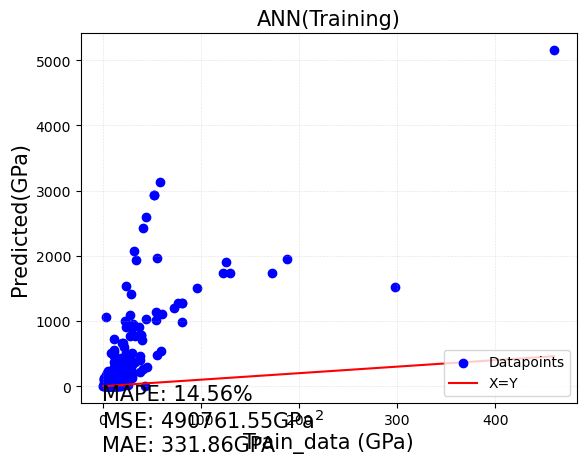

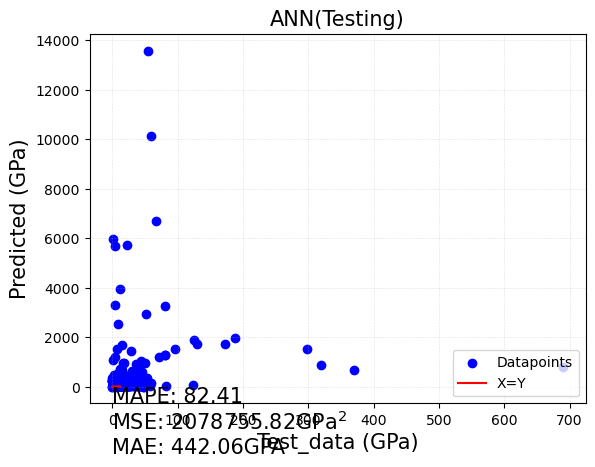

In [39]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=1, random_state=42, shuffle=True)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X)

# Apply the same transformation to the test data
X_test= scaler.transform(X_val)

x_plot = np.linspace(0, 12)
y_plot = x_plot
mycallback = tf.keras.callbacks.EarlyStopping(
    monitor='val_mape',
    min_delta=0.001,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# Define the ANN model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

# Compile the model
model.compile(loss="mae", optimizer=optimizer, metrics=["mape"])

# Train the model
history = model.fit(
    X,
    y,
    epochs=1000,
    batch_size=40,
    validation_data=(X_val, y_val),
    callbacks=[mycallback],
)
# Predict on the test set
predicted_values = model.predict(X_test)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the error
MAPE_train = mean_absolute_percentage_error(y, y_train_pred)
MAPE_test = mean_absolute_percentage_error(y_val, y_test_pred)

MSE_train = mean_squared_error(y, y_train_pred)
MSE_test = mean_squared_error(y_val, y_test_pred)

MAE_train = mean_absolute_error(y, y_train_pred)
MAE_test = mean_absolute_error(y_val, y_test_pred)


# Plot actual and predicted values for training set
plt.scatter(y, y_train_pred, color="b", label="Datapoints")
plt.plot(
    [min(y), max(y)], [min(y), max(y)], color="r", label="X=Y"
)
plt.xlabel("Train_data (GPa)", fontsize=15)
plt.ylabel("Predicted(GPa)", fontsize=15)
plt.text(
    -1,
    29.5,
    f"MAPE: {MAPE_train:.2f}%\nMSE: {MSE_train:.2f}GPa$^2$\nMAE: {MAE_train:.2f}GPA",
    ha="left",
    va="top",
    fontsize=15,
)
plt.grid(True, which="both", linestyle="dotted", linewidth=0.4, alpha=0.7)
plt.legend(loc="lower right")
plt.title("ANN(Training)", fontsize=15)
# plt.legend()
plt.show()

plt.scatter(y_val, y_test_pred, color="b", label="Datapoints")
plt.plot(x_plot, y_plot, color="r", label="X=Y")
plt.xlabel("Test_data (GPa)", fontsize=15)
plt.ylabel("Predicted (GPa)", fontsize=15)
plt.text(
    -0.5,
    13.5,
    f"MAPE: {MAPE_test:.2f}\nMSE: {MSE_test:.2f}GPa$^2$\nMAE: {MAE_test:.2f}GPA",
    ha="left",
    va="top",
    fontsize=15,
)
plt.grid(True, which="both", linestyle="dotted", linewidth=0.4, alpha=0.7)
plt.legend(loc="lower right")
plt.title("ANN(Testing)", fontsize=15)
# plt.legend()
plt.show()

In [40]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_val.shape)


X_train shape: (246, 4112)
y_train shape: (246,)
X_test shape: (250, 4112)
y_test shape: (250,)
